# Comment Length Distribution

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

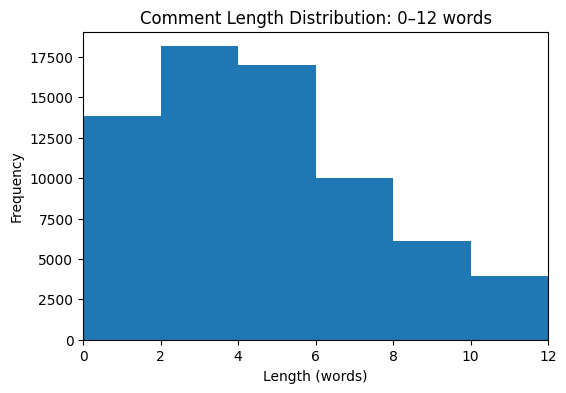

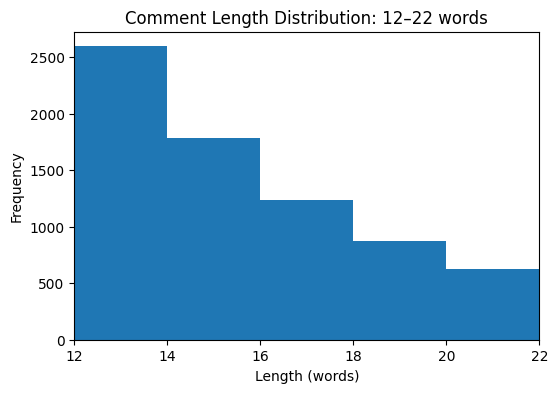

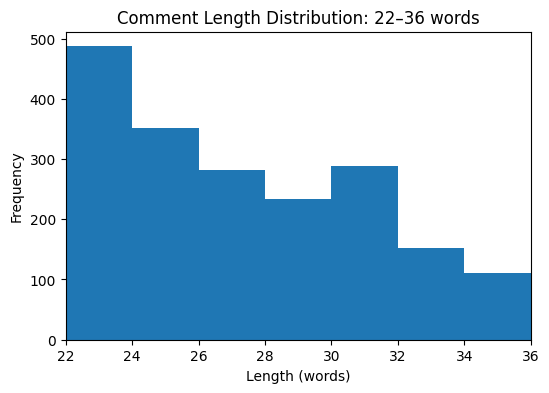

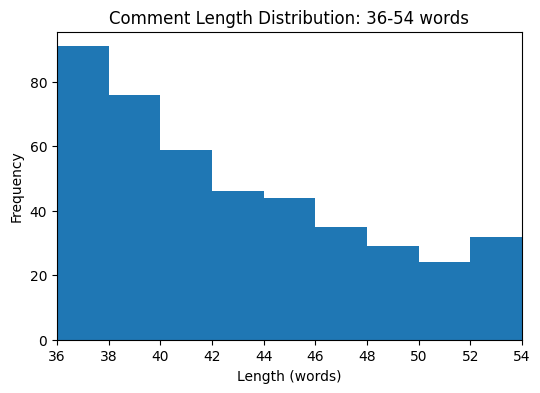

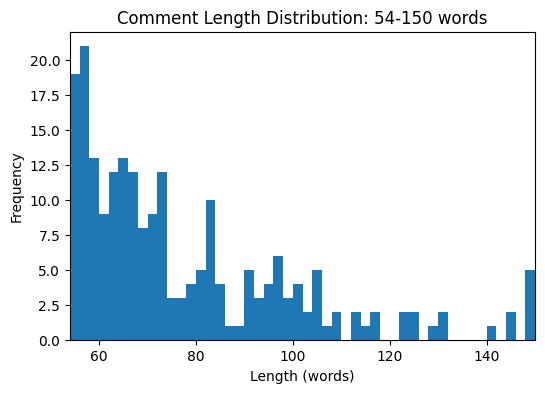

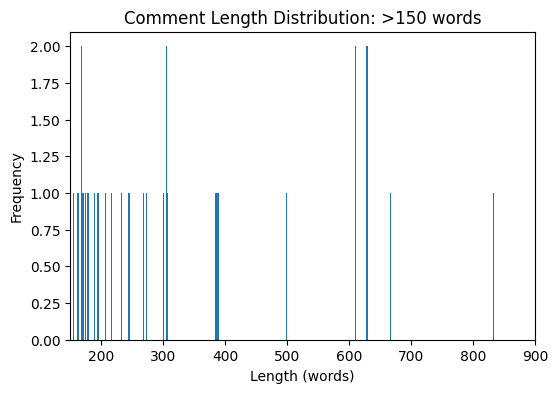

In [26]:
# Load raw comments and compute length
df = pd.read_csv('../../raw_data/comments.csv')
df['length'] = df['comment'].astype(str).apply(lambda x: len(x.split()))
max_len = df['length'].max()

# Define segments and titles
segments = [(0, 12), (12, 22), (22, 36), (36, 54), (54, 150), (150, 900)]
titles = ['0–12 words', '12–22 words', '22–36 words', '36-54 words', '54-150 words', '>150 words']

# Generate one figure per segment
for (low, high), title in zip(segments, titles):
    if high == max_len:
        data = df[df['length'] >= low]['length']
        upper = int(max_len)
    else:
        data = df[(df['length'] >= low) & (df['length'] < high)]['length']
        upper = high

    bins = range(low, upper + 5, 2)

    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins)
    plt.xlim(low, upper)
    plt.xlabel('Length (words)')
    plt.ylabel('Frequency')
    plt.title(f'Comment Length Distribution: {title}')
    plt.show()